# Import Library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import json
import numpy as np

sns.set_style("darkgrid")
d_order = ['N', 'NNE', 'NE', 'ENE', 
        'E', 'ESE', 'SE', 'SSE', 
        'S', 'SSW', 'SW', 'WSW', 
        'W', 'WNW', 'NW', 'NNW']

In [2]:
readable_mapper = {
    'giaret': 'Giá rét',
    'lanh': 'Lạnh',
    'matme': 'Mát mẻ',
    'amap': 'Ấm áp',
    'nong': 'Nóng',
    'oia': 'Oi ả',
    'emdem': 'Êm đềm',
    'nhe': 'Nhẹ',
    'trungbinh': 'Trung bình',
    'manh': 'Mạnh',
    'khongmua': 'Không mưa',
    'nho': 'Nhỏ',
    'vua': 'Vừa',
    'to': 'To',
    'ratto': 'Rất to',
    'thap': 'Thấp',
    'cao': 'Cao',
    'ratcao': 'Rất cao',
    'trongxanh': 'Trong xanh',
    'comay': 'Có mây',
    'nhieumay': 'Nhiều mây',
    'baophu': 'Mây bao phủ',
    'mb': 'Miền Bắc',
    'dhntb': 'Duyên hải Nam Trung Bộ',
    'tn': 'Tây Nguyên',
    'mn': 'Miền Nam'
}

In [3]:
temp_order = ['giaret', 'lanh', 'matme', 'amap', 'nong', 'oia']
wind_order = ['emdem', 'nhe', 'trungbinh', 'manh']
rain_order = ['khongmua', 'nho', 'vua', 'to', 'ratto']
cloud_order = ['trongxanh', 'comay', 'nhieumay', 'baophu']
humidi_order = ['thap', 'trungbinh', 'cao', 'ratcao']
pressure_order = ['thap', 'trungbinh', 'cao']

In [4]:
def anno_number(ax, lim_ratio = 1.1, dis_ratio = 0.02, font = 11):
    max_height = max([p.get_height() for p in ax.patches])
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height() + max_height * dis_ratio), fontsize = font, ha = 'center')
    ax.set_ylim(0, max_height * lim_ratio)

In [5]:
vietnam_geo = json.load(open('../datasets/vietnam_state.geojson', 'r'))

In [6]:
df = pd.read_csv("../datasets/weather_cleaned.csv")

# Data Exploring

In [7]:
def wind_d_plot(data, ax0, ax1 = None, cmap = 'Blues', unit = 'count', datamin = None, datamax = None):
    '''
    data: dataframe with columns 'd' (means direction) and 'count' (of that direction, sometimes not the real count, but the statistic of other columns)
    ax0: ax to plot wind direction pie chart
    ax1: ax to plot colorbar
    '''
    data1 = pd.DataFrame(d_order, columns = ['d'])
    data1['order'] = data1['d'].apply(lambda x: d_order.index(x))

    if not datamin: datamin = data['count'].min()
    if not datamax: datamax = data['count'].max()

    data = data1.join(data.set_index('d'), on = 'd', how = 'left', rsuffix = 'r').fillna(0)

    data['order'] = data['d'].apply(lambda x: d_order.index(x))
    data = data.sort_values(by = 'order')

    theme = plt.get_cmap(cmap)
    ax0.set_prop_cycle('color', theme((data['count'] - datamin)/(datamax- datamin)))
    ax0.pie(
        [1] * 16, labels = data['d'], startangle = 101.25, counterclock = False,
        wedgeprops = {'linewidth': 0.8, 'edgecolor': 'white'}, 
        textprops = {'ha': 'center', 'va': 'center'}, labeldistance = 1.2
    )

    if ax1:
        gradient = np.tile(np.linspace(1, 0, 256).reshape(-1, 1), (1, 10))
        # gradient = np.vstack((gradient, gradient))

        ax1.imshow(gradient, aspect = 'auto', cmap = cmap)
        ax1.grid(visible = False)
        ax1.set_xticks([])
        ax1.set_yticks(np.linspace(0, 255, 6))
        ax1.set_yticklabels(f'{i:.0f}' for i in np.linspace(datamax, datamin, 6))
        ax1.yaxis.tick_right()
        ax1.set_xlabel(unit)
        ax1.xaxis.set_label_position('top')

Text(0, 0.5, 'Miền Nam')

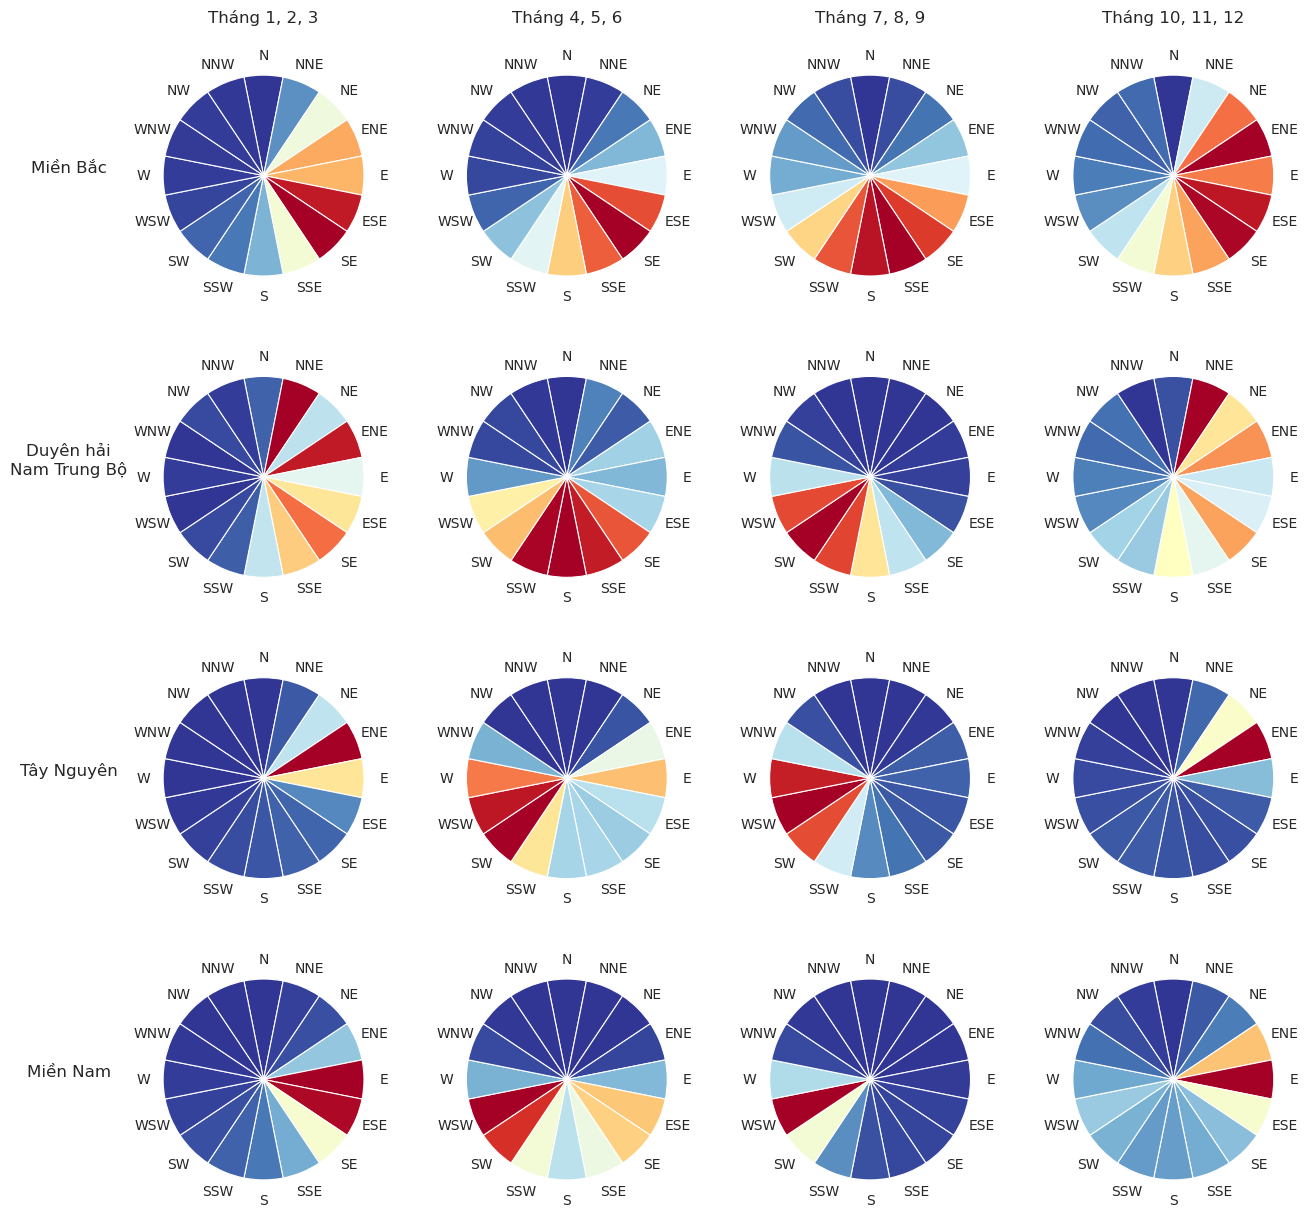

In [8]:
fig, axes = plt.subplots(ncols = 4, nrows = 4, figsize = (15, 15))

#######################----MienBac----##########################
data = df[
    (df['month'].isin([1, 2, 3])) & (df['region'] == 'mb')
].groupby(by = ['wind_d'])['max'].agg('count').reset_index()
data.columns = ['d', 'count']

wind_d_plot(data, axes[0, 0], cmap = 'RdYlBu_r')

data = df[
    (df['month'].isin([4, 5, 6])) & (df['region'] == 'mb')
].groupby(by = ['wind_d'])['max'].agg('count').reset_index()
data.columns = ['d', 'count']

wind_d_plot(data, axes[0, 1], cmap = 'RdYlBu_r')

data = df[
    (df['month'].isin([7, 8, 9])) & (df['region'] == 'mb')
].groupby(by = ['wind_d'])['max'].agg('count').reset_index()
data.columns = ['d', 'count']

wind_d_plot(data, axes[0, 2], cmap = 'RdYlBu_r')

data = df[
    (df['month'].isin([10, 11, 12])) & (df['region'] == 'mb')
].groupby(by = ['wind_d'])['max'].agg('count').reset_index()
data.columns = ['d', 'count']

wind_d_plot(data, axes[0, 3], cmap = 'RdYlBu_r')

#######################----MienTrung----##########################
data = df[
    (df['month'].isin([1, 2, 3])) & (df['region'] == 'dhntb')
].groupby(by = ['wind_d'])['max'].agg('count').reset_index()
data.columns = ['d', 'count']

wind_d_plot(data, axes[1, 0], cmap = 'RdYlBu_r')

data = df[
    (df['month'].isin([4, 5, 6])) & (df['region'] == 'dhntb')
].groupby(by = ['wind_d'])['max'].agg('count').reset_index()
data.columns = ['d', 'count']

wind_d_plot(data, axes[1, 1], cmap = 'RdYlBu_r')

data = df[
    (df['month'].isin([7, 8, 9])) & (df['region'] == 'dhntb')
].groupby(by = ['wind_d'])['max'].agg('count').reset_index()
data.columns = ['d', 'count']

wind_d_plot(data, axes[1, 2], cmap = 'RdYlBu_r')

data = df[
    (df['month'].isin([10, 11, 12])) & (df['region'] == 'dhntb')
].groupby(by = ['wind_d'])['max'].agg('count').reset_index()
data.columns = ['d', 'count']

wind_d_plot(data, axes[1, 3], cmap = 'RdYlBu_r')

#######################----TayNguyen----##########################
data = df[
    (df['month'].isin([1, 2, 3])) & (df['region'] == 'tn')
].groupby(by = ['wind_d'])['max'].agg('count').reset_index()
data.columns = ['d', 'count']

wind_d_plot(data, axes[2, 0], cmap = 'RdYlBu_r')

data = df[
    (df['month'].isin([4, 5, 6])) & (df['region'] == 'tn')
].groupby(by = ['wind_d'])['max'].agg('count').reset_index()
data.columns = ['d', 'count']

wind_d_plot(data, axes[2, 1], cmap = 'RdYlBu_r')

data = df[
    (df['month'].isin([7, 8, 9])) & (df['region'] == 'tn')
].groupby(by = ['wind_d'])['max'].agg('count').reset_index()
data.columns = ['d', 'count']

wind_d_plot(data, axes[2, 2], cmap = 'RdYlBu_r')

data = df[
    (df['month'].isin([10, 11, 12])) & (df['region'] == 'tn')
].groupby(by = ['wind_d'])['max'].agg('count').reset_index()
data.columns = ['d', 'count']

wind_d_plot(data, axes[2, 3], cmap = 'RdYlBu_r')

#######################----MienNam----##########################
data = df[
    (df['month'].isin([1, 2, 3])) & (df['region'] == 'mn')
].groupby(by = ['wind_d'])['max'].agg('count').reset_index()
data.columns = ['d', 'count']

wind_d_plot(data, axes[3, 0], cmap = 'RdYlBu_r')

data = df[
    (df['month'].isin([4, 5, 6])) & (df['region'] == 'mn')
].groupby(by = ['wind_d'])['max'].agg('count').reset_index()
data.columns = ['d', 'count']

wind_d_plot(data, axes[3, 1], cmap = 'RdYlBu_r')

data = df[
    (df['month'].isin([7, 8, 9])) & (df['region'] == 'mn')
].groupby(by = ['wind_d'])['max'].agg('count').reset_index()
data.columns = ['d', 'count']

wind_d_plot(data, axes[3, 2], cmap = 'RdYlBu_r')

data = df[
    (df['month'].isin([10, 11, 12])) & (df['region'] == 'mn')
].groupby(by = ['wind_d'])['max'].agg('count').reset_index()
data.columns = ['d', 'count']

wind_d_plot(data, axes[3, 3], cmap = 'RdYlBu_r')

axes[0, 0].set_title('Tháng 1, 2, 3', pad = 20)
axes[0, 1].set_title('Tháng 4, 5, 6', pad = 20)
axes[0, 2].set_title('Tháng 7, 8, 9', pad = 20)
axes[0, 3].set_title('Tháng 10, 11, 12', pad = 20)

axes[0, 0].set_ylabel('Miền Bắc', rotation = 0, labelpad = 50, fontsize = 12)
axes[1, 0].set_ylabel('Duyên hải\nNam Trung Bộ', rotation = 0, labelpad = 50, fontsize = 12)
axes[2, 0].set_ylabel('Tây Nguyên', rotation = 0, labelpad = 50, fontsize = 12)
axes[3, 0].set_ylabel('Miền Nam', rotation = 0, labelpad = 50, fontsize = 12)

Nhìn chung hướng gió có sự khác biệt ở các vùng miền khác nhau vào các khoảng thời gian khác nhau, 

- Miền Bắc: chủ yếu các hướng Đông, trải từ Đông Bắc tới Nam Đông Nam
- Duyên hải Nam Trung Bộ: Đông Bắc từ tháng 10 tới tháng 3 năm sau, từ Đông Nam tới Tây Nam vào tháng 4 tới tháng 9
- Tây Nguyên: Đông Đông Bắc từ tháng 10 tới tháng 3 năm sau, Tây Nam từ tháng 4 tới tháng 9
- Miền Nam: Đống, Đông Nam từ tháng 10 tới tháng 3 năm sau, Tây Nam từ tháng 4 tới tháng 9

Ngoại trừ miền Bắc hướng gió thay đổi chủ yếu ở hướng Đông, các vùng còn lại có 2 hướng gió chủ yếu:
- Đông, Đông Bắc: từ tháng 10 tới tháng 3 năm sau
- Nam, Tây Nam: từ tháng 4 tới tháng 9

Một đặc điểm chung nữa của các vùng là ghi nhận rất ít gió thổi từ các hướng Tây Bắc

In [9]:
data = df.groupby(["year", "province"]).agg({
    "rain": "sum", "min": "mean", "max": "mean", 
    "humidi": "mean", "cloud": "mean", "wind": "mean"
}).reset_index()

In [10]:
data

,year,province,rain,min,max,humidi,cloud,wind
0,2009,An Giang,3599.0,24.435616,30.712329,81.983562,40.079452,9.572603
1,2009,Ba Ria - Vung Tau,1867.9,25.230137,29.723288,80.271233,35.693151,12.821918
2,2009,Bac Lieu,1632.3,25.013699,30.372603,80.276712,37.635616,12.882192
3,2009,Ben Tre,1391.0,24.643836,31.063014,81.109589,37.408219,9.449315
4,2009,Binh Dinh,3828.9,24.613699,28.027397,83.854795,44.997260,13.523288
...,...,...,...,...,...,...,...,...
415,2020,Thua Thien - Hue,4152.1,22.638356,29.134247,81.783562,51.745205,9.517808
416,2020,Tien Giang,1618.8,24.909589,32.463014,76.452055,45.950685,8.676712
417,2020,Tra Vinh,1728.0,25.131507,31.616438,76.027397,45.419178,11.484932
418,2020,Vinh Long,1517.6,24.397260,32.367123,75.158904,45.934247,10.087671


In [11]:
fig = make_subplots(
    cols = 3, rows = 2,
    specs = [[
            {'type': 'Choropleth'}, 
            {'type': 'Choropleth'}, 
            {'type': 'Choropleth'}
        ],
        [
            {'type': 'Choropleth'}, 
            {'type': 'Choropleth'}, 
            {'type': 'Choropleth'}
        ]], #Specify type of each subplot
    subplot_titles = [
        'Trung bình nhiệt độ<br>cao nhất trong ngày',
        'Trung bình nhiệt độ<br>thấp nhất trong ngày',
        'Tổng lượng mưa',
        'Trung bình độ che phủ mây', 
        'Trung bình độ ẩm',
        'Trung bình tốc độ gió'
    ],
    vertical_spacing = 0.1,
    horizontal_spacing = 0.1
)

In [12]:
for year in data['year'].unique():
    data_segmented = data[data['year'] == year]

    data_each_year = dict(
        type = 'choropleth',
        locations = data_segmented['province'],
        z = data_segmented['max'],
        geojson = vietnam_geo,
        featureidkey = 'properties.Name',
        colorscale = 'RdYlBu_r',
        zmin = 16, zmax = 33, 
        colorbar = {'x': 0.24, 'ypad': 200, 'y': 0.79, 'title': '°C'}
    ) 

    fig.add_trace(data_each_year, row = 1, col = 1)

for year in data['year'].unique():
    data_segmented = data[data['year'] == year]

    data_each_year = dict(
        type = 'choropleth',
        locations = data_segmented['province'],
        z = data_segmented['min'],
        geojson = vietnam_geo,
        featureidkey = 'properties.Name',
        colorscale = 'RdYlBu_r',
        zmin = 16, zmax = 33, 
        colorbar = {'x': 0.61, 'ypad': 200, 'y': 0.79, 'title': '°C'}
    ) 

    fig.add_trace(data_each_year, row = 1, col = 2)

for year in data['year'].unique():
    data_segmented = data[data['year'] == year]

    data_each_year = dict(
        type = 'choropleth',
        locations = data_segmented['province'],
        z = data_segmented['rain'],
        geojson = vietnam_geo,
        featureidkey = 'properties.Name',
        colorscale = 'Darkmint',
        zmin = data['rain'].min(), zmax = data['rain'].max(),
        colorbar = {'x': 0.95, 'ypad': 200, 'y': 0.79, 'title': 'mm'}
    ) 

    fig.add_trace(data_each_year, row = 1, col = 3)

for year in data['year'].unique():
    data_segmented = data[data['year'] == year]

    data_each_year = dict(
        type = 'choropleth',
        locations = data_segmented['province'],
        z = data_segmented['cloud'],
        geojson = vietnam_geo,
        featureidkey = 'properties.Name',
        colorscale = 'Greys',
        zmin = data['cloud'].min(), zmax = data['cloud'].max(),
        colorbar = {'x': 0.24, 'ypad': 200, 'y': 0.24, 'title': '%'}
    ) 

    fig.add_trace(data_each_year, row = 2, col = 1)

for year in data['year'].unique():
    data_segmented = data[data['year'] == year]

    data_each_year = dict(
        type = 'choropleth',
        locations = data_segmented['province'],
        z = data_segmented['humidi'],
        geojson = vietnam_geo,
        featureidkey = 'properties.Name',
        colorscale = 'Blues',
        zmin = data['humidi'].min(), zmax = data['humidi'].max(),
        colorbar = {'x': 0.61, 'ypad': 200, 'y': 0.24, 'title': '%'}
    ) 

    fig.add_trace(data_each_year, row = 2, col = 2)

for year in data['year'].unique():
    data_segmented = data[data['year'] == year]

    data_each_year = dict(
        type = 'choropleth',
        locations = data_segmented['province'],
        z = data_segmented['wind'],
        geojson = vietnam_geo,
        featureidkey = 'properties.Name',
        colorscale = 'Purp',
        zmin = data['wind'].min(), zmax = data['wind'].max(),
        colorbar = {'x': 0.95, 'ypad': 200, 'y': 0.24, 'title': '%'}
    ) 

    fig.add_trace(data_each_year, row = 2, col = 3)

In [13]:
steps = []
for i in range(12):
    step = dict(
        method = 'restyle',
        args = ['visible', [False] * (6 * 12)],
        label = f'Year {i + 2009}'
    )
    for j in range(6):
        step['args'][1][i + 12 * j] = True
    steps.append(step)

In [14]:
sliders = [dict(active = 0, steps = steps)]

fig.update_layout(
    height = 1200, width = 1200,
    sliders = sliders
)

fig.update_geos(
    center = {'lat': 16, 'lon': 106},
    lataxis_range = [8, 24], 
    lonaxis_range = [101, 111],
    showcountries = True,
    resolution=50, 
)

# fig.show(config = {'scrollZoom': False})
fig.write_html('weather.html')